In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import tree

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/dhirajk100/DT-Classification/master/Decision-Tree-Classification-Data.csv')
data.head()

,age,bp,diabetes
0,65,65,1
1,45,82,0
2,35,73,1
3,45,90,0
4,50,68,1


In [3]:
data.shape

(987, 3)

In [5]:
data.describe()

,age,bp,diabetes
count,987.000000,987.000000,987.000000
mean,44.336373,79.195542,0.501520
std,6.713518,9.334513,0.500251
min,20.000000,50.000000,0.000000
25%,40.000000,72.000000,0.000000
50%,45.000000,80.000000,1.000000
75%,50.000000,87.000000,1.000000
max,70.000000,100.000000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987 entries, 0 to 986
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       987 non-null    int64
 1   bp        987 non-null    int64
 2   diabetes  987 non-null    int64
dtypes: int64(3)
memory usage: 23.3 KB


In [9]:
data.corr()

,age,bp,diabetes
age,1.000000,-0.168181,0.032764
bp,-0.168181,1.000000,-0.808126
diabetes,0.032764,-0.808126,1.000000


<AxesSubplot:>

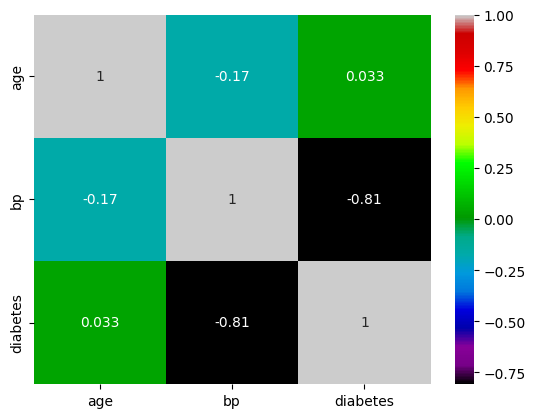

In [12]:
sns.heatmap(data.corr(),annot=True,cmap="nipy_spectral")

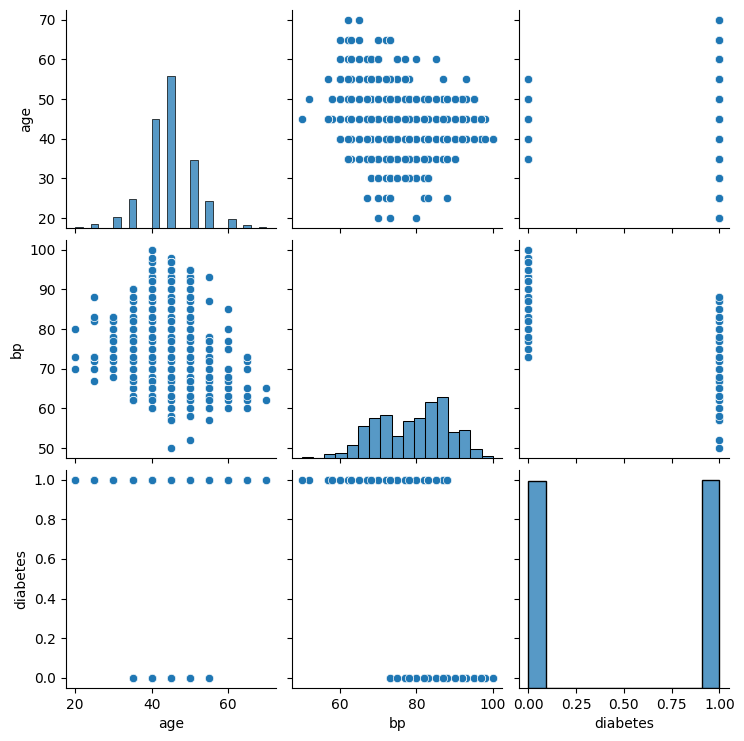

In [13]:
sns.pairplot(data)

<AxesSubplot:>

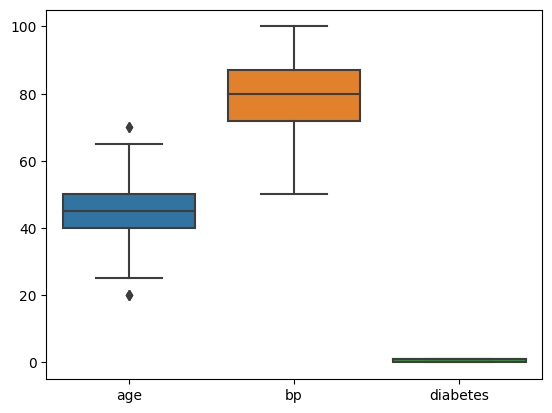

In [14]:
sns.boxplot(data=data)

Ouliters in Age column

In [21]:
Q1 = data.age.quantile(0.25)
Q3 = data.age.quantile(0.75)
Q1, Q3

(40.0, 50.0)

In [22]:
IQR = Q3 - Q1
IQR

10.0

In [23]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(25.0, 65.0)

In [26]:
df_no_outlier = data[(data.age>lower_limit)&(data.age<upper_limit)]
df_no_outlier

,age,bp,diabetes
1,45,82,0
2,35,73,1
3,45,90,0
4,50,68,1
5,40,93,0
...,...,...,...
982,45,87,0
983,40,83,0
984,40,83,0
985,40,60,1


In [33]:
data.isnull().sum()

age         0
bp          0
diabetes    0
dtype: int64

In [35]:
data['diabetes'].value_counts()

1    495
0    492
Name: diabetes, dtype: int64

Data is balanced

C:\Users\HP i7\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diabetes', ylabel='count'>

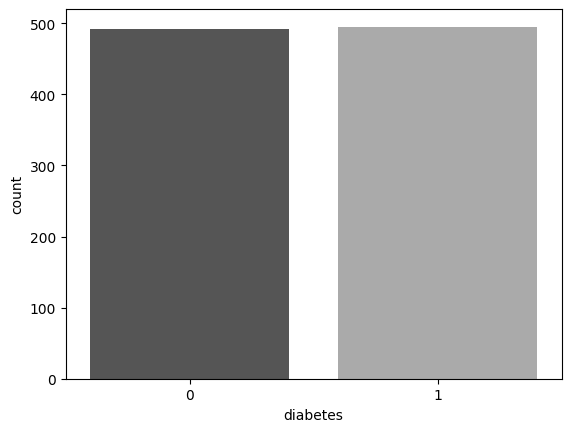

In [34]:
sns.countplot(data['diabetes'],palette="gray")

In [40]:
x = data.iloc[:,0:2].values
y = data['diabetes'].values


In [41]:
#Splitting the dataset
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [53]:
clf = DecisionTreeClassifier(criterion='entropy',max_depth=2,min_samples_split=5,random_state=0)

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

In [54]:
y_pred = clf.predict(x_test)
y_pred

array([1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0], dtype=int64)

In [55]:
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_preds)

     Actual  Predicted
0         0          1
1         0          0
2         0          0
3         1          1
4         1          1
..      ...        ...
242       1          1
243       1          1
244       0          0
245       0          0
246       0          0

[247 rows x 2 columns]


In [56]:
#confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[109,  16],
       [  6, 116]], dtype=int64)

In [57]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_1 <= 81.00
|   |--- feature_1 <= 76.00
|   |   |--- class: 1
|   |--- feature_1 >  76.00
|   |   |--- class: 1
|--- feature_1 >  81.00
|   |--- feature_0 <= 32.50
|   |   |--- class: 1
|   |--- feature_0 >  32.50
|   |   |--- class: 0



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

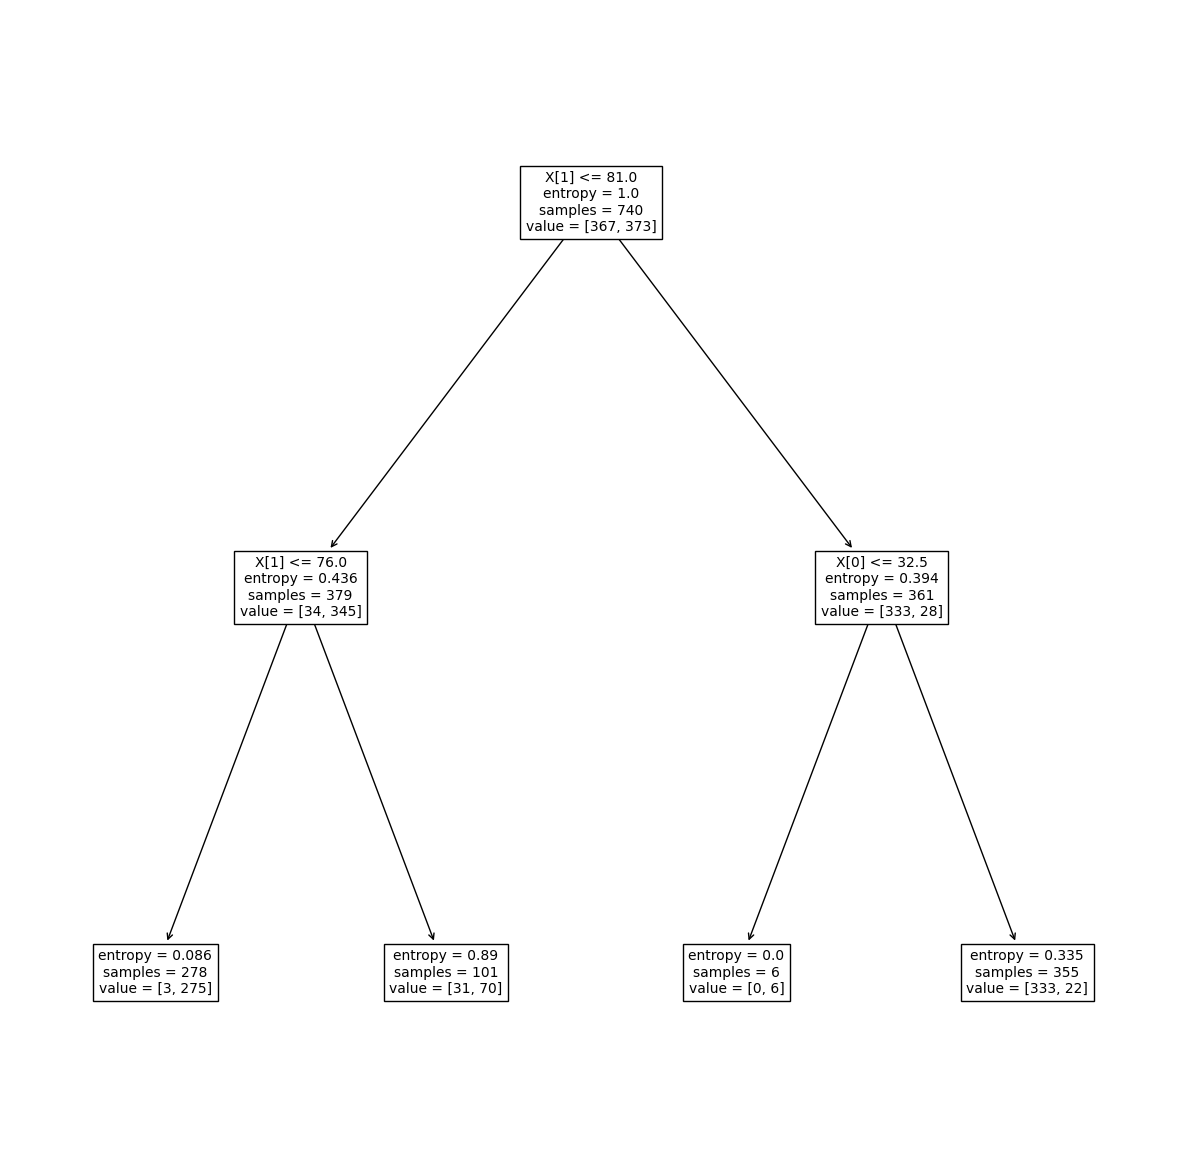

In [58]:
fig, ax = plt.subplots(figsize=(15, 15))
tree.plot_tree(clf, fontsize=10)
plt.show()

In [59]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.87      0.91       125
           1       0.88      0.95      0.91       122

    accuracy                           0.91       247
   macro avg       0.91      0.91      0.91       247
weighted avg       0.91      0.91      0.91       247



In [61]:
#accuracy
Acc = metrics.accuracy_score(y_test, y_pred)*100
print(Acc)

<IPython.core.display.Javascript object>

91.09311740890689


In [62]:
y_pred2 = clf.predict(x_train)

In [63]:
Acc2 = metrics.accuracy_score(y_train, y_pred2)*100
print(Acc2)

<IPython.core.display.Javascript object>

92.43243243243244


In [64]:
data_frame = pd.DataFrame({"Testing_Acc":Acc,"Training_Acc":Acc2},index=[1])
data_frame

,Testing_Acc,Training_Acc
1,91.093117,92.432432
